In [1]:
import pandas as pd
import scanpy as sc

In [2]:
import numpy as np

from scipy import sparse

In [3]:
from anndata import AnnData

In [4]:
import torch
import esm
# Load ESM-1b model
model, alphabet = esm.pretrained.esm1v_t33_650M_UR90S_1()
batch_converter = alphabet.get_batch_converter()

/home/hengshi/.local/lib/python3.8/site-packages/esm/pretrained.py:134: UserWarning: Regression weights not found, predicting contacts will not produce correct results.
  warnings.warn("Regression weights not found, predicting contacts will not produce correct results.")


In [5]:
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from esm import FastaBatchedDataset

In [7]:
import os

In [9]:
from sklearn.decomposition import PCA
from plotnine import * 

In [46]:
import umap

In [4]:
adata = sc.read('GSE161824_A549_KRAS.rawcounts.matrix.mtx')

Only considering the two last: ['.matrix', '.mtx'].
Only considering the two last: ['.matrix', '.mtx'].


In [6]:
adata.var

""
0
1
2
3
4
...
24486
24487
24488
24489


In [7]:
obs_names = pd.read_csv('GSE161824_A549_KRAS.rawcounts.cells.csv.gz', header = None,  compression = 'gzip')
var_names = pd.read_csv('GSE161824_A549_KRAS.rawcounts.genes.csv.gz', header = None, compression = 'gzip')

In [8]:
obs_names[0].unique().shape, obs_names.shape

((150044,), (150044, 1))

In [9]:
obs_names[obs_names[0] == 'GGAACTTGTAGCTTGT']

,0


In [10]:
adata.shape, obs_names.shape, var_names.shape

((150044, 24491), (150044, 1), (24491, 1))

In [11]:
# adata.obs = obs_names
# adata.var = var_names

In [13]:
adata_tp53 = sc.read('GSE161824_A549_TP53.rawcounts.matrix.mtx')

Only considering the two last: ['.matrix', '.mtx'].
Only considering the two last: ['.matrix', '.mtx'].


In [14]:
adata_tp53.shape

(162314, 24868)

In [15]:
obs_names_tp53 = pd.read_csv('GSE161824_A549_TP53.rawcounts.cells.csv.gz', header = None,  compression = 'gzip')
var_names_tp53 = pd.read_csv('GSE161824_A549_TP53.rawcounts.genes.csv.gz', header = None, compression = 'gzip')

In [17]:
obs_names_tp53.shape, var_names_tp53.shape

((162314, 1), (24868, 1))

In [12]:
# adata_tp53.obs = obs_names_tp53
# adata_tp53.var = var_names_tp53

In [18]:
obs_names_tp53.head()

,0
0,AAACCTGAGAATGTTG-1-0
1,AAACCTGAGCTAGCCC-1-0
2,AAACCTGAGGTCGGAT-1-0
3,AAACCTGAGGTGCAAC-1-0
4,AAACCTGAGTCCGTAT-1-0


In [19]:
len(set(list(obs_names_tp53[0])) & set(list(obs_names[0])))

1023

In [20]:
len(set(list(var_names_tp53[0])) & set(list(var_names[0])))

23984

In [21]:
list_common_cells = list(set(list(obs_names_tp53[0])) & set(list(obs_names[0])))
list_common_genes = list(set(list(var_names_tp53[0])) & set(list(var_names[0])))

In [22]:

variant_kras = pd.read_csv('GSE161824_A549_KRAS.variants2cell.csv.gz', compression = 'gzip', sep = '\t')
variant_tp53 = pd.read_csv('GSE161824_A549_TP53.variants2cell.csv.gz', compression = 'gzip', sep = '\t')


In [23]:
len(set(list(obs_names_tp53[0])) & set(list(variant_tp53['cell']))), variant_tp53.shape, obs_names_tp53.shape

(162314, (162314, 104), (162314, 1))

In [26]:
len(set(list(obs_names[0])) & set(list(variant_kras['cell']))), variant_kras.shape, obs_names.shape

(150044, (150044, 103), (150044, 1))

In [27]:
adata.obs.head()

""
0
1
2
3
4


In [28]:
len(list_common_genes)

23984

In [23]:
cell_kras = np.array(list(obs_names[0]))
cell_tp53 = np.array(list(obs_names_tp53[0]))

In [24]:
# cell_kras_common = [np.where(cell_kras == i)[0][0] for i in list_common_cells]
# cell_tp53_common = [np.where(cell_tp53 == i)[0][0] for i in list_common_cells]

# adata_kras_common = adata[cell_kras_common]
# adata_tp53_common = adata_tp53[cell_tp53_common]


# common_cell_diff = adata_kras_common.X.A[:, gene_kras_common] - adata_tp53_common.X.A[:, gene_tp53_common]

In [29]:
gene_kras = np.array(list(var_names[0]))
gene_tp53 = np.array(list(var_names_tp53[0]))

gene_kras_common = [np.where(gene_kras == i)[0][0] for i in list_common_genes]
gene_tp53_common = [np.where(gene_tp53 == i)[0][0] for i in list_common_genes]

In [30]:
variant_kras.head()

,batch,n_counts,T20R,T158T,M111L,V112I,T50I,G13C,Q22H,L159S,...,S136N,E63K,I36M,A59T,A155G,A66A,T144T,variant,variant.detailed_multi,cell
0,0,25694.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unassigned,unassigned,AAACCTGCAACGCACC-1-0
1,0,34868.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T50T,T50T,AAACCTGCAATGGTCT-1-0
2,0,25170.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unassigned,unassigned,AAACCTGCAGGACGTA-1-0
3,0,31500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,unassigned,unassigned,AAACCTGCAGTAAGAT-1-0
4,0,22654.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T127T,T127T,AAACGGGAGACAGAGA-1-0


In [34]:
obs_names.columns = ['cell']
obs_names_tp53.columns = ['cell']

In [35]:
obs_names = obs_names.merge(variant_kras, on = 'cell', how = 'left')
obs_names_tp53 = obs_names_tp53.merge(variant_tp53, on = 'cell', how = 'left')

In [53]:
obs_names.shape

(150044, 103)

In [38]:
obs_names['batch'].isna().sum(), obs_names_tp53['batch'].isna().sum()

(0, 0)

In [39]:
obs_names_kras_proc = pd.read_csv('GSE161824_A549_KRAS.processed.cells.csv.gz', header = None,  compression = 'gzip')
obs_names_tp53_proc = pd.read_csv('GSE161824_A549_TP53.processed.cells.csv.gz', header = None,  compression = 'gzip')

In [41]:
obs_names_kras_proc.shape, obs_names.shape, obs_names_tp53_proc.shape, obs_names_tp53.shape

((90262, 1), (150044, 103), (85778, 1), (162314, 104))

In [42]:
# select cells in the processed data
obs_names_kras_common_proc = list(set(list(obs_names_kras_proc[0])) & set(list(obs_names['cell'])))
obs_names_tp53_common_proc = list(set(list(obs_names_tp53_proc[0])) & set(list(obs_names_tp53['cell'])))

In [43]:
len(obs_names_kras_common_proc), len(obs_names_tp53_common_proc)

(90262, 85778)

In [48]:
cell_kras = np.array(list(obs_names['cell']))
cell_tp53 = np.array(list(obs_names_tp53['cell']))

In [49]:
cell_kras_proc_idx = [np.where(cell_kras == i)[0][0] for i in obs_names_kras_common_proc]
cell_tp53_proc_idx = [np.where(cell_tp53 == i)[0][0] for i in obs_names_tp53_common_proc]

In [50]:
adata.obs.head()

""
0
1
2
3
4


In [52]:
adata.shape, adata_tp53.shape

((150044, 24491), (162314, 24868))

In [54]:
adata_kras_proc = adata[cell_kras_proc_idx]
adata_tp53_proc = adata_tp53[cell_tp53_proc_idx]

In [55]:
adata_kras_proc.shape, adata_tp53_proc.shape

((90262, 24491), (85778, 24868))

In [57]:
obs_names = obs_names.iloc[cell_kras_proc_idx, :].copy()

obs_names_tp53 = obs_names_tp53.iloc[cell_tp53_proc_idx, :].copy()

In [60]:
obs_names['cell'].unique().shape, obs_names.shape, obs_names_tp53['cell'].unique().shape, obs_names_tp53.shape

((90262,), (90262, 103), (85778,), (85778, 104))

In [62]:
list_cell = list(obs_names['cell'])
list_cell_c = ['KRAS-' + i for i in list_cell]
np.unique(list_cell_c).shape

(90262,)

In [65]:
obs_names.index = list(range(obs_names.shape[0]))
obs_names['cell'] = list_cell_c

In [66]:
list_cell = list(obs_names_tp53['cell'])
list_cell_c = ['TP53-' + i for i in list_cell]
np.unique(list_cell_c).shape

(85778,)

In [67]:
obs_names_tp53.index = list(range(obs_names_tp53.shape[0]))
obs_names_tp53['cell'] = list_cell_c

In [71]:
data_1 = adata_kras_proc.X.A

In [72]:
data_2 = adata_tp53_proc.X.A

In [74]:
data_1.shape, data_2.shape

((90262, 24491), (85778, 24868))

In [75]:
data_1 = np.concatenate((data_1[:, gene_kras_common], 
                         data_2[:, gene_tp53_common]), axis = 0)
data_1.shape

(176040, 23984)

In [83]:
obs_names['indice_library'] = list(range(obs_names.shape[0]))
obs_names_tp53['indice_library'] = list(range(obs_names_tp53.shape[0]))

In [147]:
obs_names.to_csv('variants_library_kras.csv')
obs_names_tp53.to_csv('variants_library_tp53.csv')

In [85]:
obs_data = pd.concat([obs_names.loc[:, ['indice_library', 'cell']], 
                      obs_names_tp53.loc[:, ['indice_library', 'cell']]])
obs_data.head()

,indice_library,cell
0,0,KRAS-AAAGCAATCCCTAATT-1-11
1,1,KRAS-CCTTCGATCAGTCCCT-1-24
2,2,KRAS-GCTCCTACACGCCAGT-1-28
3,3,KRAS-CTACATTAGGCGTACA-1-27
4,4,KRAS-GCGAGAATCCTCCTAG-1-21


In [88]:
obs_data['cell'].unique().shape, obs_data.shape

((176040,), (176040, 2))

In [89]:
var_names.head()

,0
0,RP11-34P13.7
1,RP11-34P13.8
2,FO538757.3
3,FO538757.2
4,AP006222.2


In [91]:
var_names.index = list(range(var_names.shape[0]))
var_data = var_names.iloc[gene_kras_common, :].copy()
var_data.index = list(range(var_data.shape[0]))

In [94]:
var_data.columns = ['Gene']
var_data.head()

,Gene
0,DOCK8
1,CTD-2207O23.12
2,RP11-1334A24.6
3,TMEM61
4,CCNI


In [93]:
obs_data.head()

,indice_library,cell
0,0,KRAS-AAAGCAATCCCTAATT-1-11
1,1,KRAS-CCTTCGATCAGTCCCT-1-24
2,2,KRAS-GCTCCTACACGCCAGT-1-28
3,3,KRAS-CTACATTAGGCGTACA-1-27
4,4,KRAS-GCGAGAATCCTCCTAG-1-21


In [95]:
var_data.index = list(var_data['Gene'])
var_data.head()

,Gene
DOCK8,DOCK8
CTD-2207O23.12,CTD-2207O23.12
RP11-1334A24.6,RP11-1334A24.6
TMEM61,TMEM61
CCNI,CCNI


In [96]:
var_data.index.name = 'gene_name'
var_data.head()

,Gene
gene_name,
DOCK8,DOCK8
CTD-2207O23.12,CTD-2207O23.12
RP11-1334A24.6,RP11-1334A24.6
TMEM61,TMEM61
CCNI,CCNI


In [97]:
var_data['Gene'].unique().shape, var_data.shape

((23984,), (23984, 1))

In [98]:
obs_data.index = list(obs_data['cell'])
obs_data.index.name = 'cell_name'
obs_data.head()

,indice_library,cell
cell_name,,
KRAS-AAAGCAATCCCTAATT-1-11,0,KRAS-AAAGCAATCCCTAATT-1-11
KRAS-CCTTCGATCAGTCCCT-1-24,1,KRAS-CCTTCGATCAGTCCCT-1-24
KRAS-GCTCCTACACGCCAGT-1-28,2,KRAS-GCTCCTACACGCCAGT-1-28
KRAS-CTACATTAGGCGTACA-1-27,3,KRAS-CTACATTAGGCGTACA-1-27
KRAS-GCGAGAATCCTCCTAG-1-21,4,KRAS-GCGAGAATCCTCCTAG-1-21


In [101]:
data_1  = sparse.csr_matrix(data_1)

In [102]:
adata = AnnData(X = data_1, var = var_data, obs = obs_data)
adata

AnnData object with n_obs × n_vars = 176040 × 23984
    obs: 'indice_library', 'cell'
    var: 'Gene'

In [103]:
sc.settings.verbosity = 3
sc.logging.print_versions()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.4
-----
PIL                 7.2.0
backcall            0.2.0
bottleneck          1.3.2
cffi                1.14.0
cloudpickle         1.5.0
colorama            0.4.3
cycler              0.10.0
cython_runtime      NA
cytoolz             0.10.1
dask                2.20.0
dateutil            2.8.1
decorator           4.4.2
google              NA
h5py                2.10.0
ipykernel           5.3.2
ipython_genutils    0.2.0
jedi                0.17.1
joblib 

normalizing counts per cell
    finished (0:00:07)


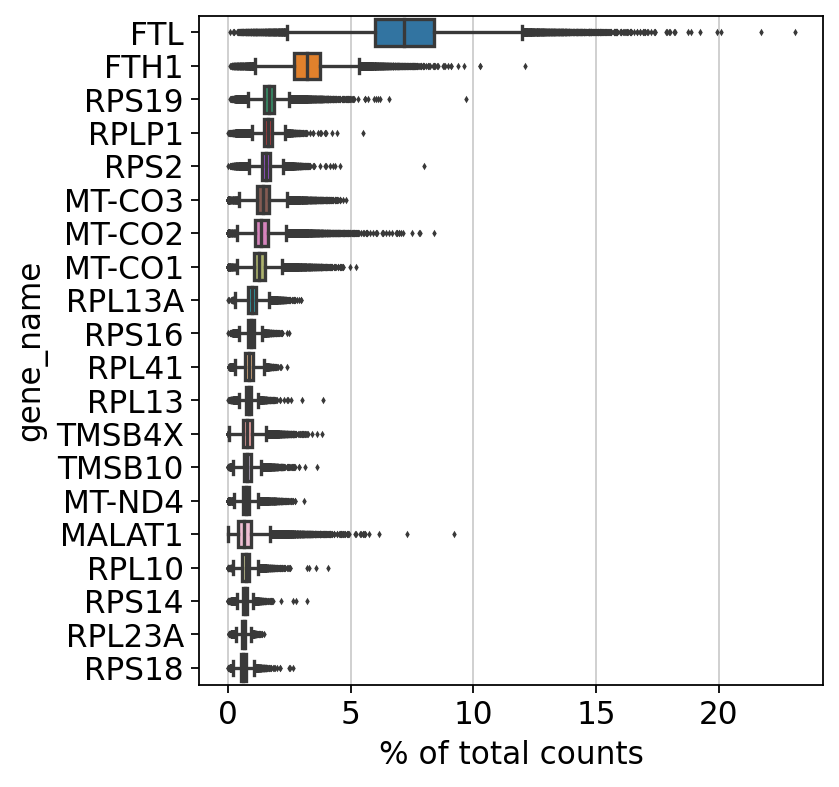

In [105]:
sc.settings.set_figure_params(dpi=80)
sc.pl.highest_expr_genes(adata, n_top = 20)

In [107]:
sc.pp.filter_cells(adata, min_genes = 200)
sc.pp.filter_genes(adata, min_cells = 3)

filtered out 86 genes that are detected in less than 3 cells


In [108]:
adata.shape

(176040, 23898)

In [110]:
mito_genes = adata.var_names.str.startswith('MT-')
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1
(adata.obs['n_genes'] < 6000).sum(), (adata.obs['percent_mito'] < 0.1).sum()

(175773, 165179)

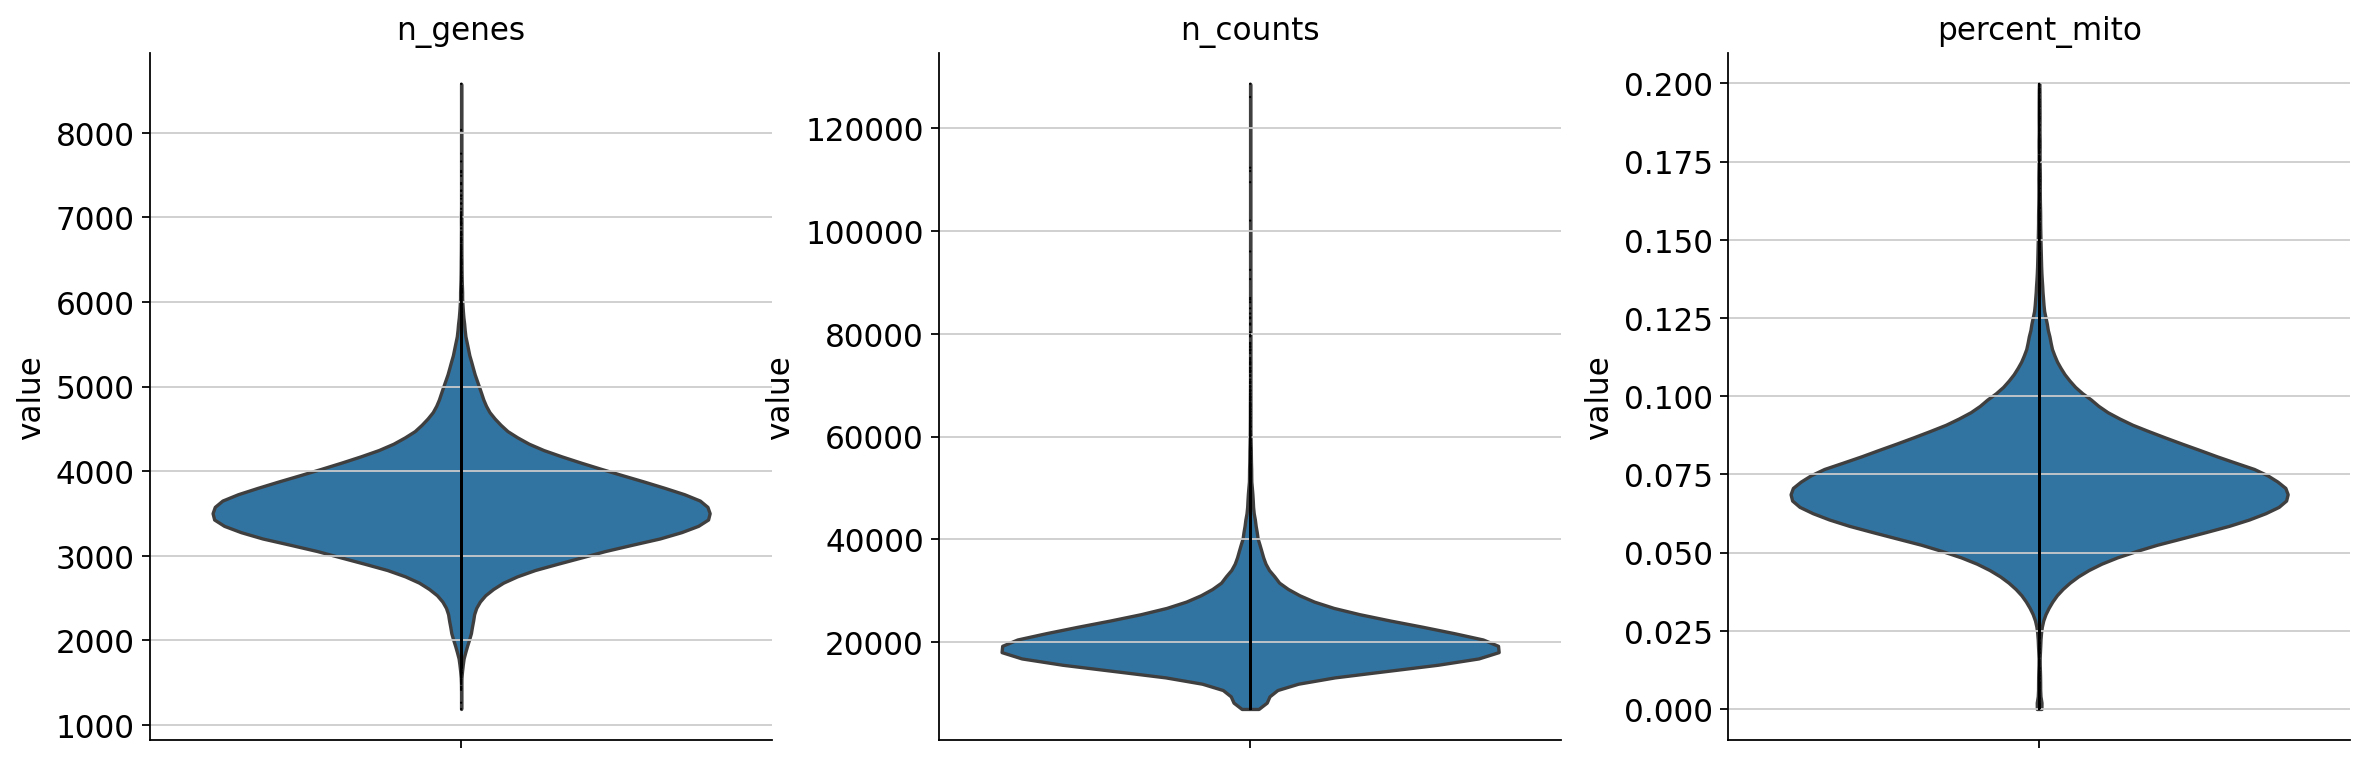

In [112]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],
             jitter=0, multi_panel=True)

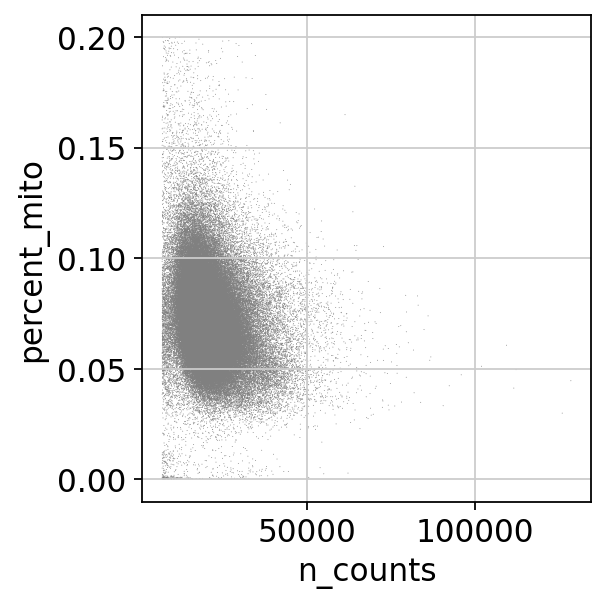

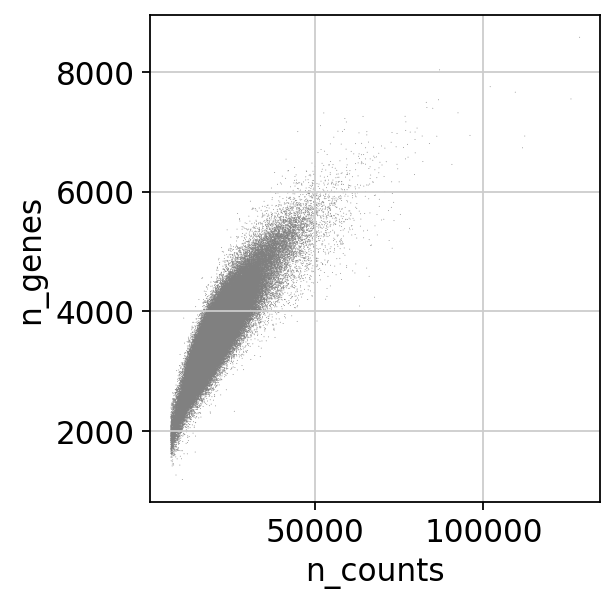

In [113]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [114]:
(adata.obs['n_genes'] < 6000).sum(), (adata.obs['percent_mito'] < 0.1).sum()

(175773, 165179)

In [116]:
adata.obs['cell'].unique().shape, adata.shape

((176040,), (176040, 23898))

In [117]:
adata = adata[adata.obs['percent_mito'] < 0.1, :]
adata = adata[adata.obs['n_genes'] < 6000, :]


In [118]:
adata.obs.head()

,indice_library,cell,n_genes,percent_mito,n_counts
cell_name,,,,,
KRAS-AAAGCAATCCCTAATT-1-11,0,KRAS-AAAGCAATCCCTAATT-1-11,3106,0.076691,14604.0
KRAS-CCTTCGATCAGTCCCT-1-24,1,KRAS-CCTTCGATCAGTCCCT-1-24,3362,0.067046,15303.0
KRAS-GCTCCTACACGCCAGT-1-28,2,KRAS-GCTCCTACACGCCAGT-1-28,4449,0.064561,28965.0
KRAS-CTACATTAGGCGTACA-1-27,3,KRAS-CTACATTAGGCGTACA-1-27,3671,0.089123,21128.0
KRAS-GCGAGAATCCTCCTAG-1-21,4,KRAS-GCGAGAATCCTCCTAG-1-21,4417,0.063134,29382.0


In [119]:
adata.write('Combine_raw_BeforeNormalize.h5ad')

In [120]:
adata_combine = adata.copy()

##  select hightly-variable genes

In [123]:
obs_data = adata_combine.obs
obs_data[obs_data['cell'] == 'KRAS-GGAACTTGTAGCTTGT']

,indice_library,cell,n_genes,percent_mito,n_counts
cell_name,,,,,


In [124]:
sc.pp.normalize_per_cell(adata_combine, counts_per_cell_after=1e6)
sc.pp.log1p(adata_combine)
adata_combine.raw = adata_combine

normalizing by total count per cell
    finished (0:00:10): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [125]:
sc.pp.highly_variable_genes(adata_combine, min_mean=0.0125, max_mean=5, min_disp=0.5)


extracting highly variable genes
    finished (0:00:17)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


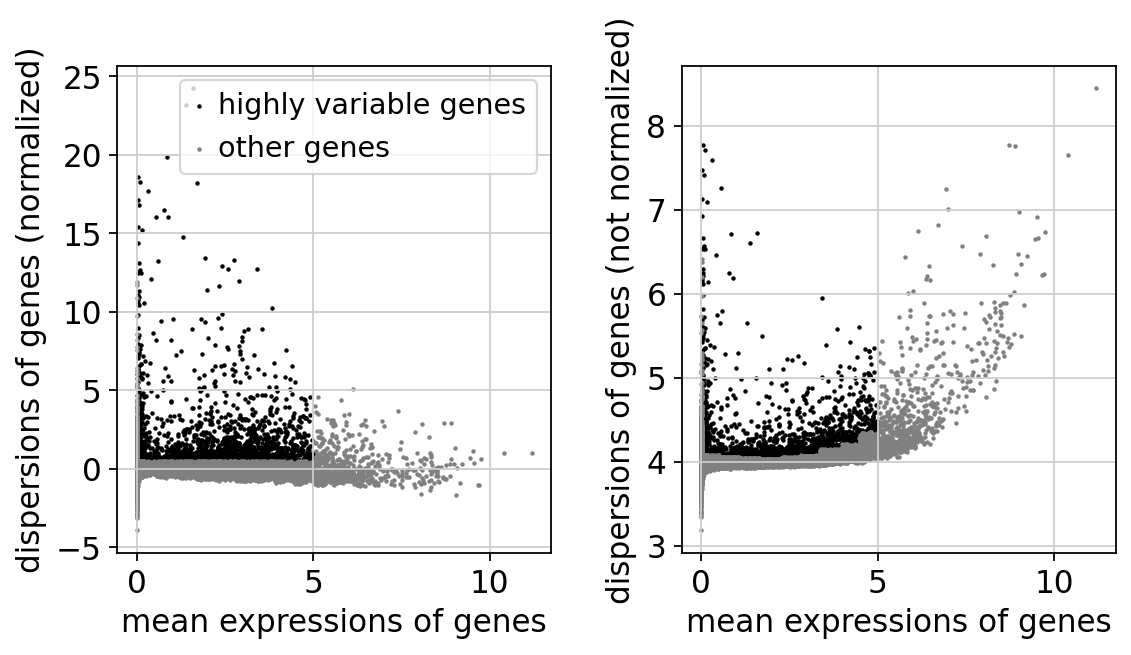

In [126]:
sc.pl.highly_variable_genes(adata_combine)

In [127]:
adata_combine.var.head()

,Gene,n_cells,highly_variable,means,dispersions,dispersions_norm
gene_name,,,,,,
DOCK8,DOCK8,636,False,0.141984,3.944643,-0.207832
CTD-2207O23.12,CTD-2207O23.12,48,False,0.012541,3.918171,-0.337444
RP11-1334A24.6,RP11-1334A24.6,27,False,0.007415,4.004300,0.084255
TMEM61,TMEM61,492,False,0.116071,3.908900,-0.382838
CCNI,CCNI,166758,False,5.154645,4.131565,-0.701516


In [129]:
highvar_gene = np.where(adata_combine.var['highly_variable'])[0]

In [130]:
highvar_gene

array([    5,    24,    32, ..., 23872, 23891, 23893])

In [131]:
adata.layers["counts"] = adata.X.copy()

In [132]:
adata.shape

(164931, 23898)

In [133]:
adata = adata[:, highvar_gene]

In [135]:
adata.layers[
    'counts'
].shape

(164931, 1629)

In [136]:
adata.shape

(164931, 1629)

In [137]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata

/home/hengshi/.local/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:155: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


In [138]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


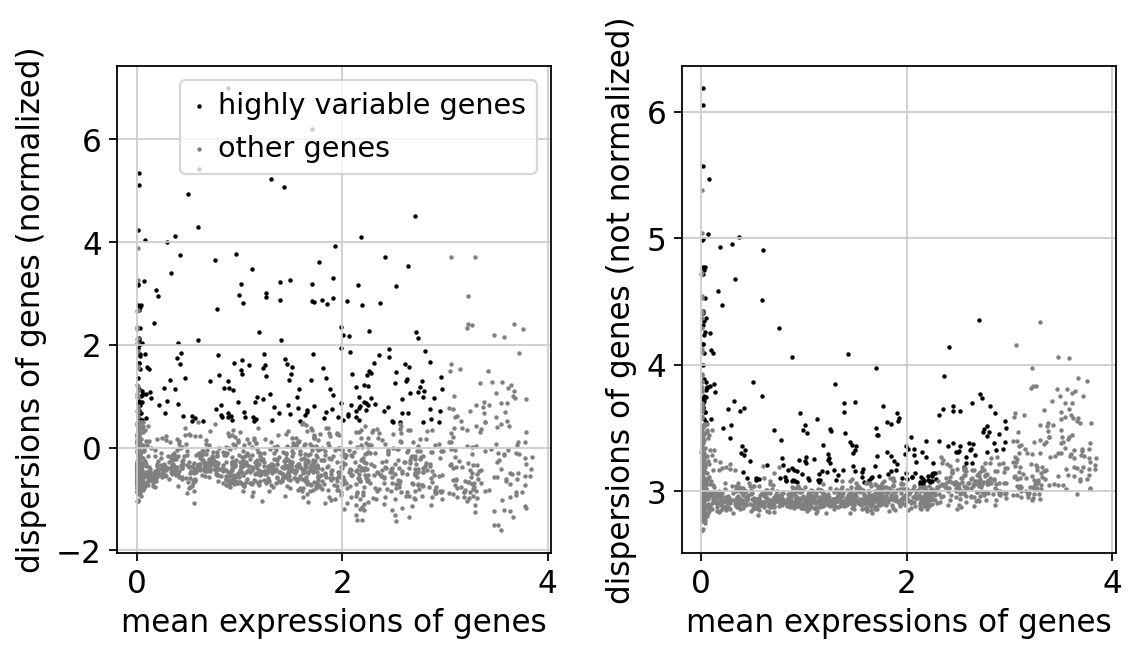

In [139]:
sc.pl.highly_variable_genes(adata)

In [140]:
adata.var.highly_variable.sum()

239

In [141]:
sc.pp.scale(adata, max_value=10)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [142]:
adata.write('Combine_processed_NormBYHighGenes_processed.h5ad')

In [143]:

obs_data = adata.obs
obs_data[obs_data['cell'] == 'KRAS_GGAACTTGTAGCTTGT']

,indice_library,cell,n_genes,percent_mito,n_counts
cell_name,,,,,


In [145]:
obs_data['cell'].unique().shape, obs_data.shape

((164931,), (164931, 5))

## Process Variant

In [150]:
obs_data = adata.obs
obs_data.head()

,indice_library,cell,n_genes,percent_mito,n_counts
cell_name,,,,,
KRAS-AAAGCAATCCCTAATT-1-11,0,KRAS-AAAGCAATCCCTAATT-1-11,3106,0.076691,14604.0
KRAS-CCTTCGATCAGTCCCT-1-24,1,KRAS-CCTTCGATCAGTCCCT-1-24,3362,0.067046,15303.0
KRAS-GCTCCTACACGCCAGT-1-28,2,KRAS-GCTCCTACACGCCAGT-1-28,4449,0.064561,28965.0
KRAS-CTACATTAGGCGTACA-1-27,3,KRAS-CTACATTAGGCGTACA-1-27,3671,0.089123,21128.0
KRAS-GCGAGAATCCTCCTAG-1-21,4,KRAS-GCGAGAATCCTCCTAG-1-21,4417,0.063134,29382.0


In [148]:
obs_names.head()

,cell,batch,n_counts,T20R,T158T,M111L,V112I,T50I,G13C,Q22H,...,S136N,E63K,I36M,A59T,A155G,A66A,T144T,variant,variant.detailed_multi,indice_library
0,KRAS-AAAGCAATCCCTAATT-1-11,11,14604.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WT,WT,0
1,KRAS-CCTTCGATCAGTCCCT-1-24,24,15303.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,V8V,V8V,1
2,KRAS-GCTCCTACACGCCAGT-1-28,28,28965.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G12R,G12R,2
3,KRAS-CTACATTAGGCGTACA-1-27,27,21128.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T158T,T158T,3
4,KRAS-GCGAGAATCCTCCTAG-1-21,21,29382.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C118S,C118S,4


In [151]:
obs_data['cell'][obs_data['cell'].duplicated()]

Series([], Name: cell, dtype: object)

In [152]:
obs_data[obs_data['cell'] == 'KRAS_GGAACTTGTAGCTTGT']

,indice_library,cell,n_genes,percent_mito,n_counts
cell_name,,,,,


In [153]:
obs_names['indice'] = list(range(obs_names.shape[0]))
vardata_kras = obs_data.merge(obs_names.loc[:, ['indice', 'cell']], on = 'cell', how = 'left')

In [158]:
vardata_kras['indice'].isna().sum(), (-vardata_kras['indice'].isna()).sum()

(77996, 86935)

In [159]:
obs_names_tp53['indice'] = list(range(obs_names_tp53.shape[0]))
vardata_tp53 = obs_data.merge(obs_names_tp53.loc[:, ['indice', 'cell']], on = 'cell', how = 'left')

In [160]:
vardata_tp53['indice'].isna().sum(), (-vardata_tp53['indice'].isna()).sum()

(86935, 77996)

In [166]:
np.where(np.array(list(-vardata_tp53['indice'].isna())))[0]

array([ 86935,  86936,  86937, ..., 164928, 164929, 164930])

In [168]:
np.where(np.array(list(vardata_kras['indice'].isna())))[0]

array([ 86935,  86936,  86937, ..., 164928, 164929, 164930])

In [ ]:
vardata_kras.to_csv('')

In [169]:
vardata_kras.to_csv('variants_library_kras_align_processed.csv')
vardata_tp53.to_csv('variants_library_tp53_align_processed.csv')

In [170]:
vardata_kras

,indice_library,cell,n_genes,percent_mito,n_counts,indice
0,0,KRAS-AAAGCAATCCCTAATT-1-11,3106,0.076691,14604.0,NaN
1,1,KRAS-CCTTCGATCAGTCCCT-1-24,3362,0.067046,15303.0,NaN
2,2,KRAS-GCTCCTACACGCCAGT-1-28,4449,0.064561,28965.0,NaN
3,3,KRAS-CTACATTAGGCGTACA-1-27,3671,0.089123,21128.0,NaN
4,4,KRAS-GCGAGAATCCTCCTAG-1-21,4417,0.063134,29382.0,NaN


In [61]:
np.where(vardata_kras['cell'])[0][-1]

164932

In [62]:
vardata_kras.shape

(164933, 7)

In [64]:
variant_tp53.shape

(164933, 7)

In [6]:
vardata_kras = pd.read_csv('variants_library_kras_align_processed.csv')
vardata_tp53 = pd.read_csv('variants_library_tp53_align_processed.csv')

In [8]:
vardata_kras.head()

,Unnamed: 0,indice_library,cell,n_genes,percent_mito,n_counts,indice
0,0,0,KRAS-AAAGCAATCCCTAATT-1-11,3106,0.076691,14604.0,0.0
1,1,1,KRAS-CCTTCGATCAGTCCCT-1-24,3362,0.067046,15303.0,1.0
2,2,2,KRAS-GCTCCTACACGCCAGT-1-28,4449,0.064561,28965.0,2.0
3,3,3,KRAS-CTACATTAGGCGTACA-1-27,3671,0.089123,21128.0,3.0
4,4,4,KRAS-GCGAGAATCCTCCTAG-1-21,4417,0.063134,29382.0,4.0


In [9]:
obs_names_kras = pd.read_csv('variants_library_kras.csv')
obs_names_tp53 = pd.read_csv('variants_library_tp53.csv')

In [10]:
obs_names_kras.head()

,Unnamed: 0,cell,batch,n_counts,T20R,T158T,M111L,V112I,T50I,G13C,...,S136N,E63K,I36M,A59T,A155G,A66A,T144T,variant,variant.detailed_multi,indice_library
0,0,KRAS-AAAGCAATCCCTAATT-1-11,11,14604.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WT,WT,0
1,1,KRAS-CCTTCGATCAGTCCCT-1-24,24,15303.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,V8V,V8V,1
2,2,KRAS-GCTCCTACACGCCAGT-1-28,28,28965.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G12R,G12R,2
3,3,KRAS-CTACATTAGGCGTACA-1-27,27,21128.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T158T,T158T,3
4,4,KRAS-GCGAGAATCCTCCTAG-1-21,21,29382.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C118S,C118S,4


In [11]:
obs_names_tp53.head()

,Unnamed: 0,cell,batch,n_counts,P152L,G245C,G245S,WT,C141Y,P222P,...,P47P,G266R,V157F,G245V,C238Y,S241C,V272M,variant,variant.detailed_multi,indice_library
0,0,TP53-AGGCCGTTCTGGCGAC-1-11,11,21521.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P278S,P278S,0
1,1,TP53-TACGGATTCAATAAGG-1-6,6,20067.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,V272M,V272M,1
2,2,TP53-AGTAGTCTCGCGGATC-1-24,24,17958.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G360V,G360V,2
3,3,TP53-AGGTCCGCAGGCGATA-1-23,23,22793.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P152L,P152L,3
4,4,TP53-GGTGCGTTCTGCAAGT-1-8,8,17041.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y234C,Y234C,4


In [12]:
obs_names_kras['indice'] = list(range(obs_names_kras.shape[0]))
obs_names_tp53['indice'] = list(range(obs_names_tp53.shape[0]))


In [16]:
obs_names_kras.head()

,Unnamed: 0,cell,batch,n_counts,T20R,T158T,M111L,V112I,T50I,G13C,...,E63K,I36M,A59T,A155G,A66A,T144T,variant,variant.detailed_multi,indice_library,indice
0,0,KRAS-AAAGCAATCCCTAATT-1-11,11,14604.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,WT,WT,0,0
1,1,KRAS-CCTTCGATCAGTCCCT-1-24,24,15303.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,V8V,V8V,1,1
2,2,KRAS-GCTCCTACACGCCAGT-1-28,28,28965.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,G12R,G12R,2,2
3,3,KRAS-CTACATTAGGCGTACA-1-27,27,21128.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,T158T,T158T,3,3
4,4,KRAS-GCGAGAATCCTCCTAG-1-21,21,29382.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,C118S,C118S,4,4


In [14]:
indice_kras = np.array(list(vardata_kras['indice']))[np.where(np.array(list(-vardata_kras['indice'].isna())))[0]]
indice_tp53 = np.array(list(vardata_tp53['indice']))[np.where(np.array(list(-vardata_tp53['indice'].isna())))[0]]

In [21]:
obs_names_kras_vardata = pd.DataFrame({'indice': [int(i) for i in indice_kras]})
obs_names_kras_vardata = obs_names_kras_vardata.merge(obs_names_kras, on = 'indice', how = 'left')
obs_names_kras_vardata.head()

,indice,Unnamed: 0,cell,batch,n_counts,T20R,T158T,M111L,V112I,T50I,...,S136N,E63K,I36M,A59T,A155G,A66A,T144T,variant,variant.detailed_multi,indice_library
0,0,0,KRAS-AAAGCAATCCCTAATT-1-11,11,14604.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WT,WT,0
1,1,1,KRAS-CCTTCGATCAGTCCCT-1-24,24,15303.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,V8V,V8V,1
2,2,2,KRAS-GCTCCTACACGCCAGT-1-28,28,28965.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G12R,G12R,2
3,3,3,KRAS-CTACATTAGGCGTACA-1-27,27,21128.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T158T,T158T,3
4,4,4,KRAS-GCGAGAATCCTCCTAG-1-21,21,29382.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C118S,C118S,4


In [22]:
obs_names_kras_vardata.shape

(86935, 106)

In [23]:
obs_names_tp53_vardata = pd.DataFrame({'indice': [int(i) for i in indice_tp53]})
obs_names_tp53_vardata = obs_names_tp53_vardata.merge(obs_names_tp53, on = 'indice', how = 'left')
obs_names_tp53_vardata.head()

,indice,Unnamed: 0,cell,batch,n_counts,P152L,G245C,G245S,WT,C141Y,...,P47P,G266R,V157F,G245V,C238Y,S241C,V272M,variant,variant.detailed_multi,indice_library
0,0,0,TP53-AGGCCGTTCTGGCGAC-1-11,11,21521.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P278S,P278S,0
1,1,1,TP53-TACGGATTCAATAAGG-1-6,6,20067.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,V272M,V272M,1
2,2,2,TP53-AGTAGTCTCGCGGATC-1-24,24,17958.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G360V,G360V,2
3,3,3,TP53-AGGTCCGCAGGCGATA-1-23,23,22793.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,P152L,P152L,3
4,4,4,TP53-GGTGCGTTCTGCAAGT-1-8,8,17041.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Y234C,Y234C,4


In [24]:
obs_names_tp53_vardata.shape

(77996, 107)

In [26]:
# base proteins
data_all = FastaBatchedDataset.from_file('../KRAS.fasta')
batches = data_all.get_batch_indices(4096, extra_toks_per_seq = 1)
data_loader = torch.utils.data.DataLoader(
    data_all, collate_fn=alphabet.get_batch_converter(), batch_sampler=batches
    )
for i, data in enumerate(data_loader):
    print(i)
    
base_protein_kras = data[1][0]



data_all = FastaBatchedDataset.from_file('../TP53.fasta')
batches = data_all.get_batch_indices(4096, extra_toks_per_seq = 1)
data_loader = torch.utils.data.DataLoader(
    data_all, collate_fn=alphabet.get_batch_converter(), batch_sampler=batches
    )
for i, data in enumerate(data_loader):
    print(i)
    
base_protein_tp53 = data[1][0]

0
0


In [28]:
base_protein_tp53

'MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD'

In [29]:
changes_kras = obs_names_kras_vardata.columns
changes_kras = list(changes_kras)[5:-3]
np.array(changes_kras)

array(['T20R', 'T158T', 'M111L', 'V112I', 'T50I', 'G13C', 'Q22H', 'L159S',
       'K117R', 'T58I', 'G13V', 'A146V', 'I163S', 'Q25H', 'T50T', 'G12F',
       'R41K', 'N26Y', 'A59E', 'G12C', 'R164Q', 'T158A', 'L19F', 'G60S',
       'WT', 'C118S', 'K117N', 'P110S', 'Q61H', 'G12R', 'G77A', 'M170L',
       'G75A', 'AG59GV', 'K178K', 'D30D', 'K169K', 'G12Y', 'T127T',
       'K176Q', 'Q99E', 'Y166H', 'K147N', 'P34L', 'G12I', 'S17S', 'R149K',
       'Q61P', 'L79I', 'A130V', 'C185Y', 'G13E', 'A146T', 'Q61R', 'F141L',
       'Q61L', 'L52F', 'Q22K', 'V14L', 'T20T', 'V14I', 'T74T', 'K5E',
       'P34R', 'D173D', 'G60D', 'AG11TD', 'R68S', 'D119G', 'G12A',
       'R135T', 'K179R', 'A59G', 'D57N', 'K88K', 'K147T', 'G13R', 'V8V',
       'T74A', 'T20M', 'G60V', 'A146P', 'Q61A', 'Q61K', 'G12S', 'E31K',
       'T50P', 'T144P', 'G12D', 'G12V', 'D33E', 'S136N', 'E63K', 'I36M',
       'A59T', 'A155G', 'A66A', 'T144T'], dtype='<U6')

In [35]:
changes_tp53 = obs_names_tp53_vardata.columns
changes_tp53 = list(changes_tp53)[5:-3]
np.array(changes_tp53)

array(['P152L', 'G245C', 'G245S', 'WT', 'C141Y', 'P222P', 'H214R',
       'R337C', 'V272L', 'K132R', 'Q5R', 'R248L', 'R248W', 'E271K',
       'R273L', 'H193L', 'C135Y', 'P278L', 'C275F', 'P301P', 'A159P',
       'P278S', 'L194R', 'P359P', 'G105C', 'R249M', 'G266V', 'R273H',
       'Y205C', 'R273C', 'K132N', 'A159V', 'P153P', 'P250L', 'R158H',
       'G360V', 'C176F', 'V216V', 'S241F', 'P151S', 'C238F', 'Y163C',
       'V173M', 'C275Y', 'A83V', 'P47S', 'V173L', 'E2E', 'T170T', 'Y236C',
       'G266E', 'V216M', 'C277F', 'R249S', 'R282W', 'R280K', 'D21D',
       'S127F', 'C176Y', 'H193Y', 'R158R', 'P295P', 'S366A', 'R175H',
       'G154V', 'G244C', 'H193R', 'I195T', 'R110L', 'Y107H', 'C135F',
       'T118T', 'V31I', 'Y220C', 'R337L', 'Y234C', 'R213Q', 'C242F',
       'M246V', 'P58R', 'E285K', 'L344L', 'E339K', 'R280T', 'P36P',
       'E286K', 'R158L', 'T312S', 'H179R', 'M237I', 'G245D', 'H179Y',
       'P47P', 'G266R', 'V157F', 'G245V', 'C238Y', 'S241C', 'V272M'],
      dtype='<U5')

In [33]:
obs_names_kras_vardata[((obs_names_kras_vardata['T127T'] == 1) & (obs_names_kras_vardata['variant.detailed_multi'] != 'T127T'))]

,indice,Unnamed: 0,cell,batch,n_counts,T20R,T158T,M111L,V112I,T50I,...,S136N,E63K,I36M,A59T,A155G,A66A,T144T,variant,variant.detailed_multi,indice_library
4546,4735,4735,KRAS-TTGTAGGCACTTCTGC-1-29,29,31466.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,multiple,"AG11TD,T127T",4735
13066,13576,13576,KRAS-ATTACTCCACCTCGGA-1-15,15,20231.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,multiple,"D173D,T127T",13576
30749,31915,31915,KRAS-TCTGGAATCTGATACG-1-0,0,29698.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,multiple,"G12I,T127T",31915
41114,42686,42686,KRAS-TTAGTTCGTTCGTCTC-1-24,24,17120.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,multiple,"A130V,T127T",42686
47483,49318,49318,KRAS-ATCATCTCATTCTCAT-1-21,21,20049.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,multiple,"A59G,A66A,D119G,T127T",49318
52930,54966,54966,KRAS-TGTCCCAAGATCGATA-1-3,3,34478.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,multiple,"F141L,T127T",54966
69750,72435,72435,KRAS-AGCTCTCAGCTTATCG-1-14,14,28097.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,multiple,"G60D,T127T",72435


In [36]:
obs_names_kras_vardata['variant.detailed_multi'].isna().sum(), obs_names_tp53_vardata['variant.detailed_multi'].isna().sum()

(0, 0)

In [38]:
obs_names_kras_vardata[obs_names_kras_vardata['WT'] == 1]['variant.detailed_multi'].unique()

array(['WT', 'P34R,WT', 'T20M,WT', 'G77A,WT,Y166H', 'A59G,WT', 'G12F,WT',
       'L159S,WT', 'Q61P,WT'], dtype=object)

In [42]:
def align_change_with_protein(changes):
    
    start_char, char_place, end_char = [], [], []
    
    for i in range(len(changes)):
        
        change = changes[i]
        if change == 'WT':
            loc_wt = i
            start_char.append('*')
            end_char.append('*')
            char_place.append(-1)
            continue
        
        j = 0
        if change[1].isnumeric() is False:
            start_char.append(change[0:2])
            loc_start = 2
        else:
            start_char.append(change[0])
            loc_start = 1

        j = len(change) - 1
        if change[j - 1].isnumeric() is False:
            end_char.append(change[(j - 1):])
            place = int(change[loc_start:(j-1)])
        else:
            end_char.append(change[j])
            place = int(change[loc_start:j])


        char_place.append(int(place))
    return loc_wt, start_char, char_place, end_char

In [43]:
low_wt_kras, start_char_kras, char_place_kras, end_char_kras = align_change_with_protein(changes_kras)
low_wt_tp53, start_char_tp53, char_place_tp53, end_char_tp53 = align_change_with_protein(changes_tp53)

In [74]:
# KRAS

In [76]:
low_wt = low_wt_kras
changes = changes_kras.copy()

In [59]:
start_list = start_char_kras
place_list = char_place_kras
base_protein = base_protein_kras
low_wt = low_wt_kras

# check if starting is actually starting 
for i in range(len(start_list)):
    
    start = start_list[i]
    place = place_list[i]
    
    if start == '*':
        continue
        
    if i in [31, 34, 50, 64, 71]:
        continue
        
    if len(start) == 1:
        if base_protein[place - 1] != start:
            print('break')
            break
    else:
        if base_protein[(place - 1): (place + 1)] != start:
            print('break')
            break
print(i)
print(len(start_list))

97
98


In [62]:
np.array(start_list)[[31, 34, 50, 64, 71]]

array(['M', 'K', 'C', 'D', 'K'], dtype='<U2')

In [64]:
np.array(place_list)[[31, 34, 50, 64, 71]]

array([170, 178, 185, 173, 179])

In [83]:
np.where(place_list == 0)

(array([], dtype=int64),)

In [66]:
[base_protein[i] for i in np.array(place_list)[[31, 34, 50, 64, 71]]]

['I', 'G', 'C', 'E', 'C']

In [69]:
obs_names_kras_vardata.iloc[:, 5:-3].head()

,T20R,T158T,M111L,V112I,T50I,G13C,Q22H,L159S,K117R,T58I,...,G12D,G12V,D33E,S136N,E63K,I36M,A59T,A155G,A66A,T144T
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
idx_col_no_define = np.where(obs_names_kras_vardata.iloc[:, 5:-3].iloc[:, [low_wt, 31, 34, 50, 64, 71]].values.sum(1) > 0)[0]
idx_col_yes_define = np.setdiff1d(np.array(list(range(obs_names_kras_vardata.shape[0]))), idx_col_no_define)

In [80]:
obs_names_kras_vardata.iloc[idx_col_yes_define, :].head()

,indice,Unnamed: 0,cell,batch,n_counts,T20R,T158T,M111L,V112I,T50I,...,S136N,E63K,I36M,A59T,A155G,A66A,T144T,variant,variant.detailed_multi,indice_library
1,1,1,KRAS-CCTTCGATCAGTCCCT-1-24,24,15303.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,V8V,V8V,1
2,2,2,KRAS-GCTCCTACACGCCAGT-1-28,28,28965.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,G12R,G12R,2
3,3,3,KRAS-CTACATTAGGCGTACA-1-27,27,21128.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T158T,T158T,3
4,4,4,KRAS-GCGAGAATCCTCCTAG-1-21,21,29382.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C118S,C118S,4
5,5,5,KRAS-CCCAGTTTCTCTAAGG-1-12,12,12427.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,T144T,T144T,5


In [77]:
len(idx_col_no_define), len(idx_col_yes_define), len(changes)

(5555, 81380, 98)

In [78]:
idx_removed_variants = np.array([low_wt, 31, 34, 50, 64, 71])
idx_kept_variants = np.setdiff1d(np.array(list(range(len(changes)))), idx_removed_variants)

In [81]:
obs_names_kras_vardata.iloc[:, 5:-3].values[:, idx_kept_variants].sum(1).min()

0.0

In [94]:
def generate_protein_seq(obs_data, col_idx_variant, row_idx_cell, start_list, 
                         place_list, end_list, base_protein):

    start_kept_char = np.array(start_list)[col_idx_variant]
    place_kept_char = np.array(place_list)[col_idx_variant]
    end_kept_char = np.array(end_list)[col_idx_variant]
    
    row_place = {}
    change_place = {}
    new_variant = []
    wrong_cell = []
    
    row, col = np.where(obs_data.iloc[row_idx_cell, :].iloc[:, idx_kept_variants].values > 0)

    for i in range(len(row)):
        r, c = row[i], col[i]

        start = start_kept_char[c]
        place = place_kept_char[c] - 1
        end = end_kept_char[c]

        # find conflicting chanages
        if r in row_place.keys():

            if place in row_place[r]:
                wrong_cell.append(r)

            row_place[r].append(place)

            if len(start) > 1:
                row_place[r].append(place + 1)
                change_place[r].append(end[0])
                change_place[r].append(end[1])
            else:
                change_place[r].append(end)
        else:
            row_place[r] = [place]
            if len(start) > 1:
                row_place[r].append(place + 1)
                change_place[r] = [end[0], end[1]]
            else:
                change_place[r] = [end]
        
        if i == 0:
            print('start: collect changes')
        if i % 10000 == 0:
            print(i)
            
    for r in range(len(row_idx_cell)):
        if r not in row_place.keys():
            new_protein = base_protein
        else:
            new_protein = ""
            places = row_place[r]
            ends = change_place[r]
            for j in range(len(base_protein)):
                if j in places:
                    k = np.where(np.array(places) == j)[0][0]
                    end = ends[k]
                    new_protein += end 
                else:
                    new_protein += base_protein[j]
        new_variant.append(new_protein)

        if r == 0:
            print('start: protein')
            
        if r % 10000 == 0:
            print(r)
    return wrong_cell, new_variant
        
    
        

In [95]:
wrong_cell, new_protein = generate_protein_seq(obs_names_kras_vardata.iloc[:, 5:-3], 
                                               idx_kept_variants, 
                                               idx_col_yes_define, 
                                               start_list, 
                                               place_list, 
                                               end_char_kras, 
                                               base_protein_kras)

start: collect changes
0
10000
20000
30000
40000
50000
60000
70000
80000
start: protein
0
10000
20000
30000
40000
50000
60000
70000
80000


In [96]:
len(wrong_cell)

21

In [100]:
len(new_protein), obs_names_kras_vardata.shape, len(idx_col_yes_define)

(81380, (86935, 106), 81380)

In [101]:
right_cell = np.setdiff1d(np.array(list(range(len(idx_col_yes_define)))), wrong_cell)

In [167]:
max([len(i) for i in np.unique(np.array(new_protein))]), min([len(i) for i in np.unique(np.array(new_protein))])

(189, 189)

In [168]:
protein_seq = np.array([base_protein_kras] * obs_names_kras_vardata.shape[0])
id_use = np.array(idx_col_yes_define)[right_cell]
protein_seq[id_use] = np.array(new_protein)[right_cell]
obs_names_kras_vardata['variant_seq'] = protein_seq

In [169]:
protein_seq_use = np.array(['Not'] * obs_names_kras_vardata.shape[0])
protein_seq_use[id_use] = 'Yes'
obs_names_kras_vardata['variant_seq_use'] = protein_seq_use

In [170]:
obs_names_kras_vardata['variant_seq_use'] == 'Yes'

0        False
1         True
2         True
3         True
4         True
         ...  
86930     True
86931     True
86932     True
86933     True
86934     True
Name: variant_seq_use, Length: 86935, dtype: bool

In [171]:
obs_names_kras_vardata.shape

(86935, 108)

In [174]:
obs_names_kras_vardata.head()


,indice,Unnamed: 0,cell,batch,n_counts,T20R,T158T,M111L,V112I,T50I,...,I36M,A59T,A155G,A66A,T144T,variant,variant.detailed_multi,indice_library,variant_seq,variant_seq_use
0,0,0,KRAS-AAAGCAATCCCTAATT-1-11,11,14604.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,WT,WT,0,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,Not
1,1,1,KRAS-CCTTCGATCAGTCCCT-1-24,24,15303.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,V8V,V8V,1,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,Yes
2,2,2,KRAS-GCTCCTACACGCCAGT-1-28,28,28965.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,G12R,G12R,2,MTEYKLVVVGARGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,Yes
3,3,3,KRAS-CTACATTAGGCGTACA-1-27,27,21128.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,T158T,T158T,3,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,Yes
4,4,4,KRAS-GCGAGAATCCTCCTAG-1-21,21,29382.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,C118S,C118S,4,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,Yes


In [175]:

obs_names_kras_vardata.to_csv('variants_library_kras_variant_seq.csv')

In [176]:
obs_names_kras_vardata[obs_names_kras_vardata['variant_seq_use'] == 'Yes']['variant_seq'].unique().shape

(596,)

In [151]:
# TP53

In [177]:
low_wt = low_wt_tp53
changes = changes_tp53.copy()

start_list = start_char_tp53
place_list = char_place_tp53
base_protein = base_protein_tp53
low_wt = low_wt_tp53

# check if starting is actually starting 
for i in range(len(start_list)):
    
    start = start_list[i]
    place = place_list[i]
    
    if start == '*':
        continue
        
#     if i in [31, 34, 50, 64, 71]:
#         continue
        
    if len(start) == 1:
        if base_protein[place - 1] != start:
            print('break')
            break
    else:
        if base_protein[(place - 1): (place + 1)] != start:
            print('break')
            break
print(i)
print(len(start_list))

98
99


In [178]:
obs_names_tp53_vardata.iloc[:, 5:-3].head()

,P152L,G245C,G245S,WT,C141Y,P222P,H214R,R337C,V272L,K132R,...,M237I,G245D,H179Y,P47P,G266R,V157F,G245V,C238Y,S241C,V272M
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [183]:
idx_col_no_define = np.where(obs_names_tp53_vardata.iloc[:, 5:-3].iloc[:, [low_wt]].values.sum(1) > 0)[0]
idx_col_yes_define = np.setdiff1d(np.array(list(range(obs_names_tp53_vardata.shape[0]))), idx_col_no_define)
len(idx_col_no_define), len(idx_col_yes_define), len(changes)

(311, 77685, 99)

In [184]:
idx_removed_variants = np.array([low_wt])
idx_kept_variants = np.setdiff1d(np.array(list(range(len(changes)))), idx_removed_variants)

In [185]:
obs_names_tp53_vardata.iloc[:, 5:-3].values[:, idx_kept_variants].sum(1).min()

0.0

In [187]:
wrong_cell, new_protein = generate_protein_seq(obs_names_tp53_vardata.iloc[:, 5:-3], 
                                               idx_kept_variants, 
                                               idx_col_yes_define, 
                                               start_list, 
                                               place_list, 
                                               end_char_tp53, 
                                               base_protein_tp53)

start: collect changes
0
10000
20000
30000
40000
50000
60000
70000
start: protein
0
10000
20000
30000
40000
50000
60000
70000


In [188]:
len(wrong_cell), len(new_protein), obs_names_tp53_vardata.shape, len(idx_col_yes_define)

(13, 77685, (77996, 107), 77685)

In [189]:
right_cell = np.setdiff1d(np.array(list(range(len(idx_col_yes_define)))), wrong_cell)

In [190]:
max([len(i) for i in np.unique(np.array(new_protein))]), min([len(i) for i in np.unique(np.array(new_protein))])

(393, 393)

In [191]:
protein_seq = np.array([base_protein_tp53] * obs_names_tp53_vardata.shape[0])
id_use = np.array(idx_col_yes_define)[right_cell]

protein_seq[id_use] = np.array(new_protein)[right_cell]
obs_names_tp53_vardata['variant_seq'] = protein_seq

protein_seq_use = np.array(['Not'] * obs_names_tp53_vardata.shape[0])
protein_seq_use[id_use] = 'Yes'
obs_names_tp53_vardata['variant_seq_use'] = protein_seq_use

In [194]:
obs_names_tp53_vardata[obs_names_tp53_vardata['variant_seq_use'] == 'Yes']['variant_seq'].unique().shape

(742,)

In [193]:

obs_names_tp53_vardata.to_csv('variants_library_tp53_variant_seq.csv')

# Embed variants to decide the values

In [7]:
obs_names_kras_vardata = pd.read_csv('variants_library_kras_variant_seq.csv')
obs_names_tp53_vardata = pd.read_csv('variants_library_tp53_variant_seq.csv')

(array([515.,   3.,  16.,  61.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000e+00, 2.49700e+02, 4.98400e+02, 7.47100e+02, 9.95800e+02,
        1.24450e+03, 1.49320e+03, 1.74190e+03, 1.99060e+03, 2.23930e+03,
        2.48800e+03, 2.73670e+03, 2.98540e+03, 3.23410e+03, 3.48280e+03,
        3.73150e+03, 3.98020e+03, 4.22890e+03, 4.47760e+03, 4.72630e+03,
        4.97500e+03, 5.22370e+03, 5.47240e+03, 5.72110e+03, 5.96980e+03,
        6.21850e+03, 6.46720e+03, 6.71590e+03, 6.96460e+03, 7.21330e+03,
        7.46200e+03, 7.71070e+03, 7.95940e+03, 8.20810e+03, 8.45680e+03,
        8.70550e+03, 8.95420e+03, 9.20290e+03, 9.45160e+03, 9.70030e+03,
        9.94900e+03, 1.01977e+04, 1.04464e+04, 1.06951e+04, 1.09438e+04,
 

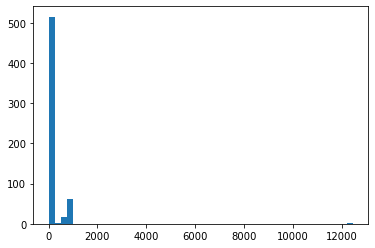

In [8]:
kras_cnt = obs_names_kras_vardata[obs_names_kras_vardata['variant_seq_use'] == 'Yes']['variant_seq'].value_counts()
plt.hist(kras_cnt, bins = 50)

(array([657.,   3.,  19.,  18.,  44.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.000000e+00, 2.202800e+02, 4.395600e+02, 6.588400e+02,
        8.781200e+02, 1.097400e+03, 1.316680e+03, 1.535960e+03,
        1.755240e+03, 1.974520e+03, 2.193800e+03, 2.413080e+03,
        2.632360e+03, 2.851640e+03, 3.070920e+03, 3.290200e+03,
        3.509480e+03, 3.728760e+03, 3.948040e+03, 4.167320e+03,
        4.386600e+03, 4.605880e+03, 4.825160e+03, 5.044440e+03,
        5.263720e+03, 5.483000e+03, 5.702280e+03, 5.921560e+03,
        6.140840e+03, 6.360120e+03, 6.579400e+03, 6.798680e+03,
        7.017960e+03, 7.237240e+03, 7.456520e+03, 7.675800e+03,
        7.895080e+03, 8.114360e+03, 8.333640e+03, 8.552920e+03,
        8.772200e+

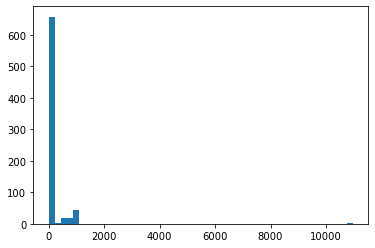

In [9]:
tp53_cnt = obs_names_tp53_vardata[obs_names_tp53_vardata['variant_seq_use'] == 'Yes']['variant_seq'].value_counts()
plt.hist(tp53_cnt, bins = 50)

In [10]:
var_kras = obs_names_kras_vardata[obs_names_kras_vardata['variant_seq_use'] == 'Yes']['variant_seq'].unique()
var_tp53 = obs_names_tp53_vardata[obs_names_tp53_vardata['variant_seq_use'] == 'Yes']['variant_seq'].unique()

In [11]:
data = []
for i in range(len(var_kras)):
    data.append(('kras_' + str(i + 1), var_kras[i]))
    
for i in range(len(var_tp53)):
    data.append(('tp53_' + str(i + 1), var_tp53[i]))


In [13]:
len(data) / 32, var_kras.shape[0], var_tp53.shape[0]

(41.8125, 596, 742)

In [14]:
idx_kras_remove = np.random.choice(var_kras.shape[0], 60, replace= False)
idx_tp53_remove = np.random.choice(var_tp53.shape[0], 70, replace= False)


np.save('removed_per_kras_60.npy', var_kras[idx_kras_remove])
np.save('removed_per_tp53_70.npy', var_tp53[idx_tp53_remove])

In [29]:
var_kras[idx_kras_remove]

array(['MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHHYREQIKRVKDSEDVPLVLVGNRCDLPSRTVDTKQAQDLARSYGIPFIETSAKTRQRVEDAFYTLVREIRQYRLKKISKEEKTPGCVKIKKCIIM',
       'MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGHEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHHYREQIKRVKDSEDVPMVLVGNKCDLPSRTVDTKQAQDLARSYGIPLIETSAKTRQRVEDAFYTLVREIRQYRLKKISKEEKTPGCVKIKKCIIM',
       'MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGHEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHHYREQIKRVKDSEDVPMVLVGNKCDLPSRTVDTKQAQDLARNYGIPFIETSAKTRQRVEDAFYTLVREIRQYRLKKISKEEKTPGCVKIKKCIIM',
       'MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGLEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHHYREQIKRVKDSEDVPMVLVGNKCDLPSRTVDTKQAQDLARSYGIPFIETSAKTRQRVEDAFYTLVRESRQYRLKKISKEEKTPGCVKIKKCIIM',
       'MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHHYREEIKRVKDSEDVPMVLVGNKSDLPSRTVDTKQAQDLARSYGIPFIETSAKTRQRVEDAFYTLVREIRQYRLKKISKEEKTPGCVKIKKCIIM',


In [18]:
batch_size = 32
sequence_representations = None
for k in range( (len(data)) // batch_size + 1):
    start = k * batch_size
    end = min(start + batch_size, len(data))
    batch_data = data[start:end]
    
    batch_labels, batch_strs, batch_tokens = batch_converter(batch_data)
    
    # Extract per-residue representations (on CPU)
    with torch.no_grad():
        results = model(batch_tokens, repr_layers=[33], return_contacts=True)
    token_representations = results["representations"][33]

    # Generate per-sequence representations via averaging
    # NOTE: token 0 is always a beginning-of-sequence token, so the first residue is token 1.    
    for i, (_, seq) in enumerate(batch_data):
        if sequence_representations is None:
            sequence_representations = token_representations[i, 1 : len(seq) + 1].mean(0).numpy().reshape(1, -1)
        else:
            sequence_representations = np.concatenate((sequence_representations, 
                                                       token_representations[i, 1 : len(seq) + 1].mean(0).numpy().reshape(1, -1)
                                                      ), axis = 0)
            
    if k % 10 == 0:
        print(k)
        np.save('sequence_representation.npy', sequence_representations)
        

0
10
20
30
40


NameError: name 'batch_converter' is not defined

In [22]:
np.save('sequence_representation.npy', sequence_representations)
sequence_data = pd.DataFrame(sequence_representations)
sequence_data['Variant'] = np.concatenate((var_kras, var_tp53))
sequence_data['Dataset'] = ['KRAS'] * var_kras.shape[0] + ['TP53'] * var_tp53.shape[0]
sequence_data.to_csv('sequence_representation.csv')

In [24]:
sequence_data['Variant'].shape, sequence_data['Variant'].unique().shape

((1338,), (1338,))

In [ ]:
obs_names_kras_vardata = pd.read_csv(os.path.join(path_data, 'variants_library_kras_variant_seq.csv'))

In [27]:
obs_names_kras_vardata.shape, obs_names_tp53_vardata.shape


((86935, 109), (77996, 110))

In [28]:
obs_names_kras_vardata.head()

,Unnamed: 0,indice,Unnamed: 0.1,cell,batch,n_counts,T20R,T158T,M111L,V112I,...,I36M,A59T,A155G,A66A,T144T,variant,variant.detailed_multi,indice_library,variant_seq,variant_seq_use
0,0,0,0,KRAS-AAAGCAATCCCTAATT-1-11,11,14604.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,WT,WT,0,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,Not
1,1,1,1,KRAS-CCTTCGATCAGTCCCT-1-24,24,15303.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,V8V,V8V,1,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,Yes
2,2,2,2,KRAS-GCTCCTACACGCCAGT-1-28,28,28965.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,G12R,G12R,2,MTEYKLVVVGARGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,Yes
3,3,3,3,KRAS-CTACATTAGGCGTACA-1-27,27,21128.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,T158T,T158T,3,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,Yes
4,4,4,4,KRAS-GCGAGAATCCTCCTAG-1-21,21,29382.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,C118S,C118S,4,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,Yes


In [ ]:
kept_kras_indices = [i for i in range(len(perturb_kras)) if perturb_kras[i] not in removed_kras]
kept_tp53_indices = [i for i in range(len(perturb_tp53)) if perturb_tp53[i] not in removed_tp53]


In [30]:
np.where(np.array(list(obs_names_kras_vardata['variant_seq_use'] == 'Yes')))

(array([    1,     2,     3, ..., 86932, 86933, 86934]),)

In [34]:
path_data = '.'
obs_names_kras_vardata = pd.read_csv(os.path.join(path_data, 'variants_library_kras_variant_seq.csv'))
obs_names_tp53_vardata = pd.read_csv(os.path.join(path_data, 'variants_library_tp53_variant_seq.csv'))
n_kras = obs_names_kras_vardata.shape[0]
n_tp53 = obs_names_tp53_vardata.shape[0]

idx_yes_kras = np.where(np.array(list(obs_names_kras_vardata['variant_seq_use'] == 'Yes')))[0]
idx_yes_tp53 = np.where(np.array(list(obs_names_tp53_vardata['variant_seq_use'] == 'Yes')))[0]

perturb_kras = np.array(list(obs_names_kras_vardata['variant_seq']))[idx_yes_kras]
perturb_tp53 = np.array(list(obs_names_tp53_vardata['variant_seq']))[idx_yes_tp53]

removed_kras = np.load(os.path.join(path_data, 'removed_per_kras_60.npy'), allow_pickle=True)
removed_tp53 = np.load(os.path.join(path_data, 'removed_per_tp53_70.npy'), allow_pickle=True)

kept_kras_indices = [i for i in range(len(perturb_kras)) if perturb_kras[i] not in removed_kras]
kept_tp53_indices = [i for i in range(len(perturb_tp53)) if perturb_tp53[i] not in removed_tp53]

idx_yes_tp53_kept = np.array(list(range(len(range(n_tp53) ))))[idx_yes_tp53][kept_tp53_indices]

idx_yes_tp53_adjust = np.array([i + n_kras for i in idx_yes_tp53_kept])
idx_yes_kras_adjust = np.array(list(range(len(range(n_kras) ))))[idx_yes_kras][kept_kras_indices]
idx_yes_adjust = np.concatenate((idx_yes_kras_adjust, idx_yes_tp53_adjust))

In [36]:
len(idx_yes_adjust)

134222

In [46]:
# number of cells by perturbation 
kras_cnt[kras_cnt > 400].shape, kras_cnt.shape

((81,), (596,))

In [48]:
tp53_cnt[tp53_cnt > 400].shape, tp53_cnt.shape

((83,), (742,))

## visualize embedding and find noise

In [8]:
obs_names_kras_vardata = pd.read_csv('variants_library_kras_variant_seq.csv')
obs_names_tp53_vardata = pd.read_csv('variants_library_tp53_variant_seq.csv')
sequence_data = pd.read_csv('sequence_representation.csv')

In [11]:
kras_class = obs_names_kras_vardata[obs_names_kras_vardata['variant_seq_use'] == 'Yes'].loc[:, ['variant.detailed_multi', 'variant_seq']].drop_duplicates()
tp53_class = obs_names_tp53_vardata[obs_names_tp53_vardata['variant_seq_use'] == 'Yes'].loc[:, ['variant.detailed_multi', 'variant_seq']].drop_duplicates()

In [12]:
kras_class.shape, tp53_class.shape

((797, 2), (901, 2))

In [13]:
data1 = pd.read_excel('../41587_2021_1160_MOESM3_ESM.xlsx', sheet_name = 'KRAS')
data2 = pd.read_excel('../41587_2021_1160_MOESM3_ESM.xlsx', sheet_name = 'TP53')
data1.head()

,Gene,Variant,Position,From,To,Mutation type,Control status,Library synthesis,Variant barcode,Cells/variant,Normalized variant barcode counts (TP10K),HotellingT2,HotellingT2.q,Variant functional class,Count_pancan,Count_ExAC,Count (COSMIC)
0,KRAS,G12D,12.0,C,T,Single,unknown,in,CTCAGCGAAGAGAA,496.0,1.440787,6951.69426,0.00001,Impactful IV (gain-of-function),1782.0,NaN,14489.0
1,KRAS,G12V,12.0,C,A,Single,unknown,in,TCCTGACAAGAGAA,406.0,1.456876,5032.27397,0.00001,Impactful IV (gain-of-function),1539.0,NaN,9830.0
2,KRAS,G12C,12.0,C,A,Single,unknown,in,CTACAGCAAGAGAA,769.0,1.725312,5284.76726,0.00001,Impactful IV (gain-of-function),1110.0,NaN,4792.0
3,KRAS,G13D,13.0,C,T,Single,unknown,not in library,ATGCCAAGAGAGAA,NaN,NaN,NaN,NaN,unavailable,582.0,NaN,5452.0
4,KRAS,G12A,12.0,C,G,Single,unknown,in,AAGACGCAAGAGAA,913.0,1.880001,5014.76689,0.00001,Impactful IV (gain-of-function),353.0,NaN,2297.0


In [14]:
sequence_data.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1272,1273,1274,1275,1276,1277,1278,1279,Variant,Dataset
0,0,-0.278144,0.181181,-0.236613,-0.208591,-0.564084,0.133692,-0.290223,0.081900,0.060810,...,0.141021,-0.133544,0.242172,0.066834,0.281539,-0.411984,-0.071758,-0.066045,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,KRAS
1,1,-0.290671,0.189908,-0.223619,-0.210945,-0.531849,0.142929,-0.265488,0.089358,0.060457,...,0.133564,-0.149596,0.228844,0.075109,0.286847,-0.402833,-0.073073,-0.067776,MTEYKLVVVGARGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,KRAS
2,2,-0.286262,0.178056,-0.230260,-0.207033,-0.576091,0.131740,-0.286813,0.076869,0.061103,...,0.137436,-0.140625,0.232927,0.061585,0.286072,-0.394635,-0.076619,-0.064332,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,KRAS
3,3,-0.277878,0.187001,-0.222422,-0.206262,-0.564676,0.118994,-0.282586,0.078403,0.048039,...,0.141397,-0.135488,0.240073,0.079530,0.276586,-0.406777,-0.070696,-0.060332,MTEYKLVVVGAGGVGKSALTIKLIQNHFVDEYDPTIEDSYRKQVVI...,KRAS
4,4,-0.277247,0.184518,-0.229261,-0.202723,-0.570109,0.130604,-0.297351,0.086355,0.052732,...,0.138194,-0.130781,0.249381,0.069444,0.281061,-0.405908,-0.072757,-0.071986,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,KRAS


In [22]:
list_label = list(kras_class['variant.detailed_multi'])
idx_no_comma = [i for i in range(len(list_label)) if ',' not in list_label[i]]
idx_comma = [i for i in range(len(list_label)) if ',' in list_label[i]]
len(idx_no_comma), len(idx_comma)

(93, 704)

In [24]:
kras_class = kras_class.merge(data1.loc[:, ['Variant', 'Variant functional class']], left_on = 'variant.detailed_multi', 
                              right_on = 'Variant', how = 'left')
kras_class.head()

,variant.detailed_multi,variant_seq,Variant,Variant functional class
0,V8V,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,V8V,WT-like
1,G12R,MTEYKLVVVGARGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,G12R,Impactful IV (gain-of-function)
2,T158T,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,T158T,WT-like
3,C118S,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,C118S,WT-like
4,T144T,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,T144T,WT-like


In [27]:
kras_class['Variant functional class'].isna().sum(), len(idx_comma)

(704, 704)

In [33]:
idx_kras_na_class = np.where(np.array(list(kras_class['Variant functional class'].isna())))[0]
kras_class.loc[idx_kras_na_class, 'Variant functional class'] = 'Multiple'

In [35]:
# TP53
list_label = list(tp53_class['variant.detailed_multi'])
idx_no_comma = [i for i in range(len(list_label)) if ',' not in list_label[i]]
idx_comma = [i for i in range(len(list_label)) if ',' in list_label[i]]
len(idx_no_comma), len(idx_comma)

(99, 802)

In [36]:
tp53_class = tp53_class.merge(data2.loc[:, ['Variant', 'Variant functional class']], left_on = 'variant.detailed_multi', 
                              right_on = 'Variant', how = 'left')
tp53_class['Variant functional class'].isna().sum(), len(idx_comma)

(802, 802)

In [37]:
idx_tp53_na_class = np.where(np.array(list(tp53_class['Variant functional class'].isna())))[0]
tp53_class.loc[idx_tp53_na_class, 'Variant functional class'] = 'Multiple'

In [39]:
kras_emb = kras_class.merge(sequence_data[sequence_data['Dataset'] == 'KRAS'], left_on = 'variant_seq', right_on = 'Variant', how = 'left')
tp53_emb = tp53_class.merge(sequence_data[sequence_data['Dataset'] == 'TP53'], left_on = 'variant_seq', right_on = 'Variant', how = 'left')

In [41]:
kras_emb.head()

,variant.detailed_multi,variant_seq,Variant_x,Variant functional class,Unnamed: 0,0,1,2,3,4,...,1272,1273,1274,1275,1276,1277,1278,1279,Variant_y,Dataset
0,V8V,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,V8V,WT-like,0,-0.278144,0.181181,-0.236613,-0.208591,-0.564084,...,0.141021,-0.133544,0.242172,0.066834,0.281539,-0.411984,-0.071758,-0.066045,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,KRAS
1,G12R,MTEYKLVVVGARGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,G12R,Impactful IV (gain-of-function),1,-0.290671,0.189908,-0.223619,-0.210945,-0.531849,...,0.133564,-0.149596,0.228844,0.075109,0.286847,-0.402833,-0.073073,-0.067776,MTEYKLVVVGARGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,KRAS
2,T158T,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,T158T,WT-like,0,-0.278144,0.181181,-0.236613,-0.208591,-0.564084,...,0.141021,-0.133544,0.242172,0.066834,0.281539,-0.411984,-0.071758,-0.066045,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,KRAS
3,C118S,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,C118S,WT-like,2,-0.286262,0.178056,-0.230260,-0.207033,-0.576091,...,0.137436,-0.140625,0.232927,0.061585,0.286072,-0.394635,-0.076619,-0.064332,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,KRAS
4,T144T,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,T144T,WT-like,0,-0.278144,0.181181,-0.236613,-0.208591,-0.564084,...,0.141021,-0.133544,0.242172,0.066834,0.281539,-0.411984,-0.071758,-0.066045,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,KRAS


In [42]:
tp53_emb.head()

,variant.detailed_multi,variant_seq,Variant_x,Variant functional class,Unnamed: 0,0,1,2,3,4,...,1272,1273,1274,1275,1276,1277,1278,1279,Variant_y,Dataset
0,P278S,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,P278S,Impactful II,596,-0.558916,0.083395,0.014333,-0.075788,-0.105707,...,-0.095723,-0.110792,-0.075020,-0.183553,-0.145107,-0.102991,0.129124,-0.099081,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,TP53
1,V272M,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,V272M,Impactful II,597,-0.553625,0.082342,0.006511,-0.078225,-0.113270,...,-0.094248,-0.107179,-0.069138,-0.188308,-0.141087,-0.103373,0.128087,-0.092262,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,TP53
2,G360V,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,G360V,WT-like,598,-0.551876,0.083785,0.010158,-0.076279,-0.109431,...,-0.099739,-0.108493,-0.069529,-0.185346,-0.139559,-0.102392,0.127172,-0.097325,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,TP53
3,P152L,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,P152L,Impactful I,599,-0.557707,0.083891,0.019711,-0.079388,-0.101598,...,-0.095254,-0.109055,-0.068548,-0.179635,-0.145939,-0.101419,0.128910,-0.089038,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,TP53
4,Y234C,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,Y234C,Impactful II,600,-0.543454,0.097385,0.027441,-0.077623,-0.108565,...,-0.092516,-0.108999,-0.057830,-0.188178,-0.127476,-0.103751,0.137384,-0.086569,MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLS...,TP53


In [44]:
data_emb = pd.concat([kras_emb,tp53_emb ])
data_emb.head()

,variant.detailed_multi,variant_seq,Variant_x,Variant functional class,Unnamed: 0,0,1,2,3,4,...,1272,1273,1274,1275,1276,1277,1278,1279,Variant_y,Dataset
0,V8V,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,V8V,WT-like,0,-0.278144,0.181181,-0.236613,-0.208591,-0.564084,...,0.141021,-0.133544,0.242172,0.066834,0.281539,-0.411984,-0.071758,-0.066045,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,KRAS
1,G12R,MTEYKLVVVGARGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,G12R,Impactful IV (gain-of-function),1,-0.290671,0.189908,-0.223619,-0.210945,-0.531849,...,0.133564,-0.149596,0.228844,0.075109,0.286847,-0.402833,-0.073073,-0.067776,MTEYKLVVVGARGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,KRAS
2,T158T,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,T158T,WT-like,0,-0.278144,0.181181,-0.236613,-0.208591,-0.564084,...,0.141021,-0.133544,0.242172,0.066834,0.281539,-0.411984,-0.071758,-0.066045,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,KRAS
3,C118S,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,C118S,WT-like,2,-0.286262,0.178056,-0.230260,-0.207033,-0.576091,...,0.137436,-0.140625,0.232927,0.061585,0.286072,-0.394635,-0.076619,-0.064332,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,KRAS
4,T144T,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,T144T,WT-like,0,-0.278144,0.181181,-0.236613,-0.208591,-0.564084,...,0.141021,-0.133544,0.242172,0.066834,0.281539,-0.411984,-0.071758,-0.066045,MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVI...,KRAS


In [47]:
pca_50 = PCA(n_components=50, random_state = 42)
pca_data = pca_50.fit_transform(data_emb.iloc[:, 5:-2].values)
X_embedded_pr = umap.UMAP(random_state=42, min_dist = 0.5, n_neighbors=30).fit_transform(pca_data)
df_tsne_pr = X_embedded_pr.copy()
df_tsne_pr = pd.DataFrame(df_tsne_pr)
df_tsne_pr['x-umap'] = X_embedded_pr[:,0]
df_tsne_pr['y-umap'] = X_embedded_pr[:,1]
df_tsne_pr['Dataset'] = list(data_emb['Dataset']) 
df_tsne_pr['Variant functional class'] = list(data_emb['Variant functional class']) 


/home/hengshi/.local/lib/python3.8/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/hengshi/.local/lib/python3.8/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


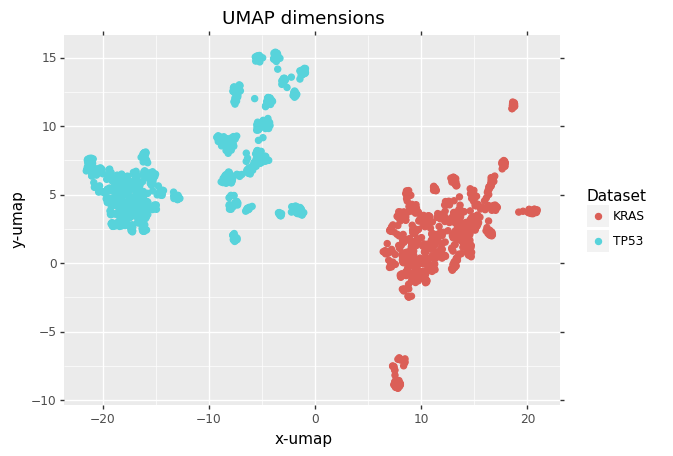

<ggplot: (2940690841727)>

In [48]:
chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Dataset') ) \
    + geom_point(size=2, alpha = 1) \
    + ggtitle("UMAP dimensions")
chart_pr

/home/hengshi/.local/lib/python3.8/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/hengshi/.local/lib/python3.8/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


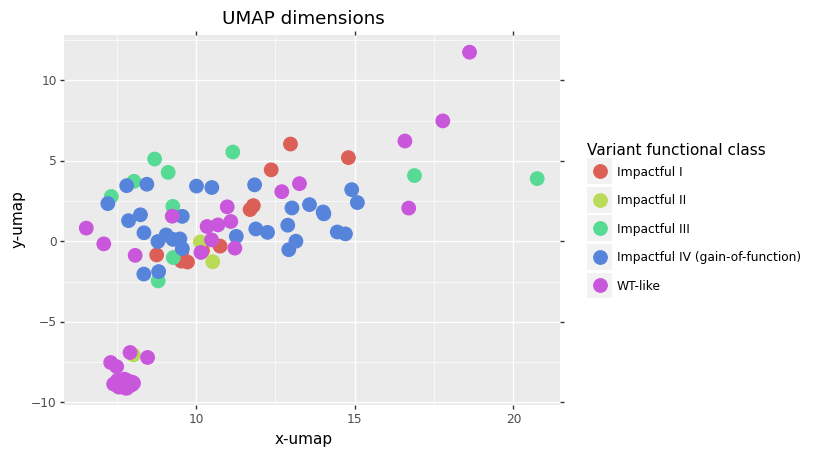

<ggplot: (2940693546310)>

In [54]:
chart_pr = ggplot(df_tsne_pr[((df_tsne_pr['Variant functional class'] != 'Multiple')
                             & (df_tsne_pr['Dataset'] == 'KRAS'))], aes(x= 'x-umap', y= 'y-umap', colour = 'Variant functional class') ) \
    + geom_point(size=5, alpha = 1) \
    + ggtitle("UMAP dimensions")
chart_pr

/home/hengshi/.local/lib/python3.8/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/hengshi/.local/lib/python3.8/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


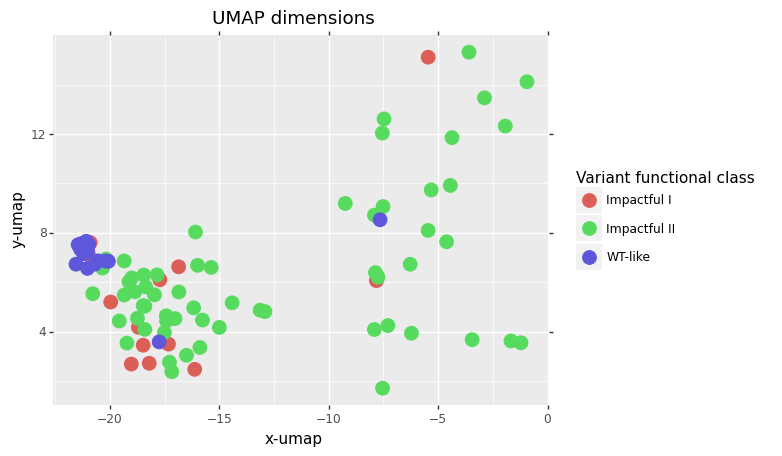

<ggplot: (2940739281872)>

In [55]:
chart_pr = ggplot(df_tsne_pr[((df_tsne_pr['Variant functional class'] != 'Multiple')
                             & (df_tsne_pr['Dataset'] == 'TP53'))], aes(x= 'x-umap', y= 'y-umap', colour = 'Variant functional class') ) \
    + geom_point(size=5, alpha = 1) \
    + ggtitle("UMAP dimensions")
chart_pr

/home/hengshi/.local/lib/python3.8/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/hengshi/.local/lib/python3.8/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


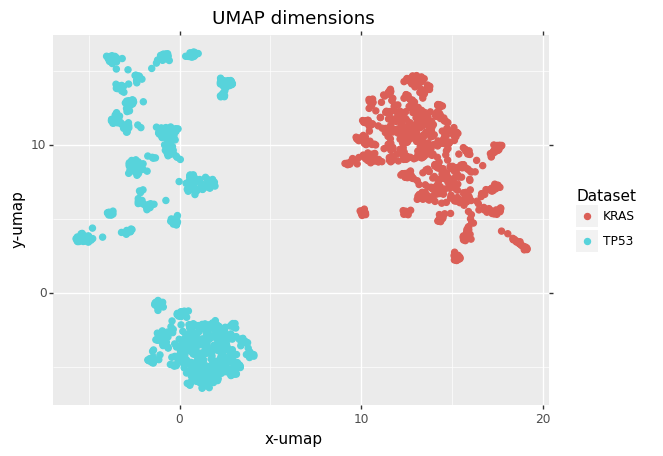

<ggplot: (2940722816603)>

In [66]:

# add noise
pca_50 = PCA(n_components=50, random_state = 42)
pca_data = pca_50.fit_transform(data_emb.iloc[:, 5:-2].values + np.random.normal(scale = 0.001, size = data_emb.iloc[:, 5:-2].values.shape))
X_embedded_pr = umap.UMAP(random_state=42, min_dist = 0.5, n_neighbors=30).fit_transform(pca_data)
df_tsne_pr = X_embedded_pr.copy()
df_tsne_pr = pd.DataFrame(df_tsne_pr)
df_tsne_pr['x-umap'] = X_embedded_pr[:,0]
df_tsne_pr['y-umap'] = X_embedded_pr[:,1]
df_tsne_pr['Dataset'] = list(data_emb['Dataset']) 
df_tsne_pr['Variant functional class'] = list(data_emb['Variant functional class']) 
chart_pr = ggplot(df_tsne_pr, aes(x= 'x-umap', y= 'y-umap', colour = 'Dataset') ) \
    + geom_point(size=2, alpha = 1) \
    + ggtitle("UMAP dimensions")
chart_pr

/home/hengshi/.local/lib/python3.8/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/hengshi/.local/lib/python3.8/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


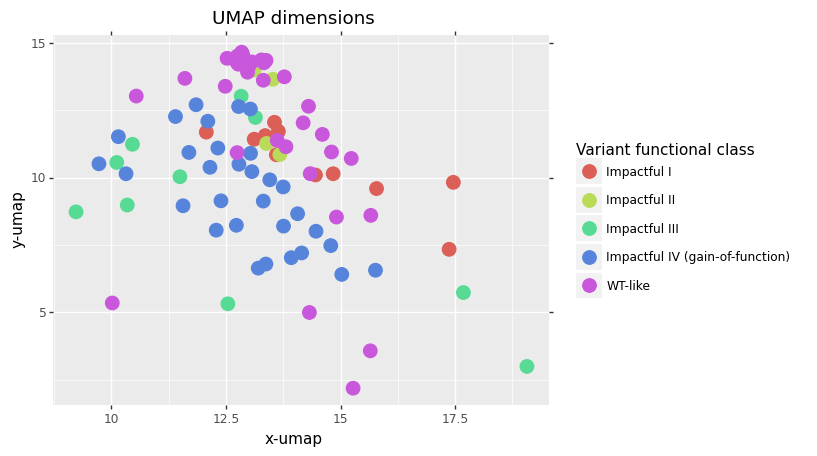

<ggplot: (2940722854702)>

In [67]:
chart_pr = ggplot(df_tsne_pr[((df_tsne_pr['Variant functional class'] != 'Multiple')
                             & (df_tsne_pr['Dataset'] == 'KRAS'))], aes(x= 'x-umap', y= 'y-umap', colour = 'Variant functional class') ) \
    + geom_point(size=5, alpha = 1) \
    + ggtitle("UMAP dimensions")
chart_pr

/home/hengshi/.local/lib/python3.8/site-packages/plotnine/scales/scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
/home/hengshi/.local/lib/python3.8/site-packages/plotnine/utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


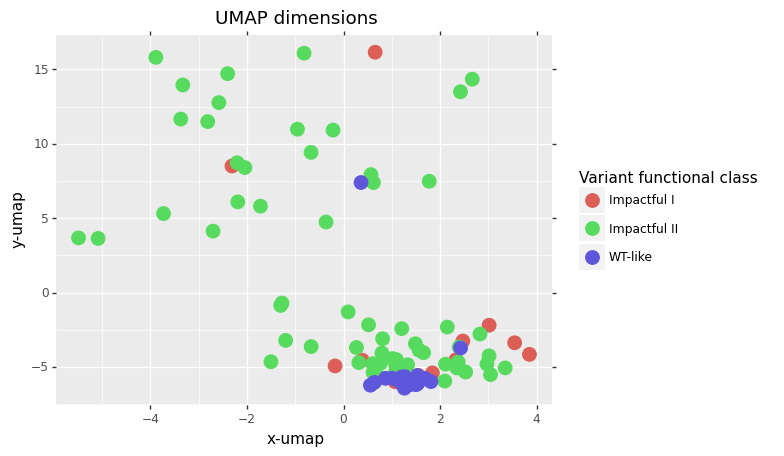

<ggplot: (2940722785413)>

In [68]:
chart_pr = ggplot(df_tsne_pr[((df_tsne_pr['Variant functional class'] != 'Multiple')
                             & (df_tsne_pr['Dataset'] == 'TP53'))], aes(x= 'x-umap', y= 'y-umap', colour = 'Variant functional class') ) \
    + geom_point(size=5, alpha = 1) \
    + ggtitle("UMAP dimensions")
chart_pr

In [70]:
np.mean(data_emb.iloc[:, 5:-2].values.var(0) < 0.001)

0.2

In [72]:
kras_cnt = obs_names_kras_vardata[obs_names_kras_vardata['variant_seq_use'] == 'Yes']['variant_seq'].value_counts()

In [77]:
list(kras_cnt[kras_cnt > 400].keys())

['MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHHYREQIKRVKDSEDVPMVLVGNKCDLPSRTVDTKQAQDLARSYGIPFIETSAKTRQRVEDAFYTLVREIRQYRLKKISKEEKTPGCVKIKKCIIM',
 'MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTASQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHHYREQIKRVKDSEDVPMVLVGNKCDLPSRTVDTKQAQDLARSYGIPFIETSAKTRQRVEDAFYTLVREIRQYRLKKISKEEKTPGCVKIKKCIIM',
 'MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHHYREQIKRVKDSEDVPMVLVGNKCDLPSRTVDTKQAQDLATSYGIPFIETSAKTRQRVEDAFYTLVREIRQYRLKKISKEEKTPGCVKIKKCIIM',
 'MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHHYREQIKRVKDSEDVPLVLVGNKCDLPSRTVDTKQAQDLARSYGIPFIETSAKTRQRVEDAFYTLVREIRQYRLKKISKEEKTPGCVKIKKCIIM',
 'MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHHYREQIKRVKDSEDVPMILVGNKCDLPSRTVDTKQAQDLARSYGIPFIETSAKTRQRVEDAFYTLVREIRQYRLKKISKEEKTPGCVKIKKCIIM',
 'MTEYKLVVVGAGGVGKSALTIQLIQNHF

In [78]:
# original sequence
removed_kras = np.load(os.path.join('.', 'removed_per_kras_60.npy'), allow_pickle=True)
removed_tp53 = np.load(os.path.join('.', 'removed_per_tp53_70.npy'), allow_pickle=True)

In [79]:
base_protein_kras = 'MTEYKLVVVGAGGVGKSALTIQLIQNHFVDEYDPTIEDSYRKQVVIDGETCLLDILDTAGQEEYSAMRDQYMRTGEGFLCVFAINNTKSFEDIHHYREQIKRVKDSEDVPMVLVGNKCDLPSRTVDTKQAQDLARSYGIPFIETSAKTRQRVEDAFYTLVREIRQYRLKKISKEEKTPGCVKIKKCIIM'
base_protein_tp53 = 'MEEPQSDPSVEPPLSQETFSDLWKLLPENNVLSPLPSQAMDDLMLSPDDIEQWFTEDPGPDEAPRMPEAAPPVAPAPAAPTPAAPAPAPSWPLSSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNTSSSPQPKKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPGGSRAHSSHLKSKKGQSTSRHKKLMFKTEGPDSD'
base_proteins = [base_protein_kras, base_protein_tp53]

In [80]:
base_protein_kras in removed_kras, base_protein_kras in list(kras_cnt[kras_cnt > 400].keys())

(False, True)

In [82]:
tp53_cnt = obs_names_tp53_vardata[obs_names_tp53_vardata['variant_seq_use'] == 'Yes']['variant_seq'].value_counts()

In [83]:
base_protein_tp53 in removed_tp53, base_protein_tp53 in list(tp53_cnt[tp53_cnt > 400].keys())

(True, True)

In [84]:
sequence_data.shape

(1338, 1283)